In [2]:
import pandas as pd 
df=pd.read_csv('ai_dev_productivity.csv')

In [4]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
num_col = df.select_dtypes(include=["int64", "float64"]).columns.drop("task_success")
num_col

Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
min_scaler = MinMaxScaler()

df[num_col] = min_scaler.fit_transform(df[num_col])

In [7]:
df.head()

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,0.499167,1.000000,0.125,0.400000,0.153846,0.2,0.111635,0.488889,1
1,0.393333,0.946128,0.250,0.557143,0.384615,0.6,0.275157,0.411111,1
2,0.525000,0.932660,0.125,0.842857,0.153846,0.0,0.356918,0.133333,1
3,0.670833,1.000000,0.875,0.471429,0.692308,1.0,0.220126,0.544444,0
4,0.377500,0.698653,0.750,0.557143,0.307692,0.0,0.198113,0.588889,1


In [8]:
print(df.columns)

Index(['hours_coding', 'coffee_intake_mg', 'distractions', 'sleep_hours',
       'commits', 'bugs_reported', 'ai_usage_hours', 'cognitive_load',
       'task_success'],
      dtype='object')


# K-means

K-Means Clustering Results
Labels: [1 1 3 1 2 3 0 1 1 0]
Silhouette Score: 0.1539108925065688
Calinski-Harabasz Index: 97.94711488929948


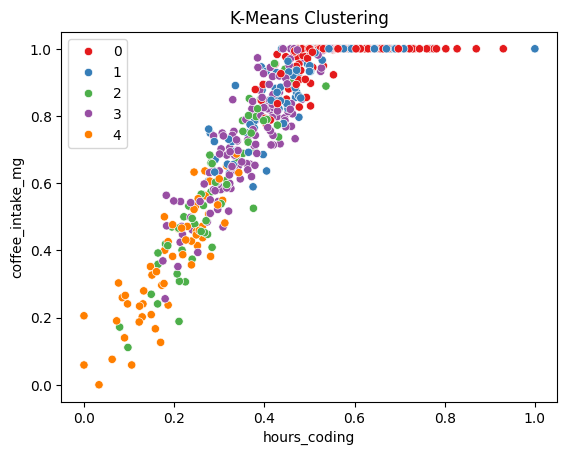

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features for clustering
features = df.drop(['task_success'], axis=1)

# K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(features)

# Evaluation metrics
sil_score = silhouette_score(features, kmeans_labels)
ch_score = calinski_harabasz_score(features, kmeans_labels)

print("K-Means Clustering Results")
print("Labels:", kmeans_labels[:10])  
print("Silhouette Score:", sil_score)
print("Calinski-Harabasz Index:", ch_score)

# Optional visualization 
sns.scatterplot(x=features.iloc[:,0], y=features.iloc[:,1], hue=kmeans_labels, palette='Set1')
plt.title('K-Means Clustering')
plt.show()


# Hierarchical Clustering

Hierarchical Clustering Results
Labels: [0 2 1 2 0 1 1 2 2 2]
Silhouette Score: 0.12316037730592723
Calinski-Harabasz Index: 85.8923481535438


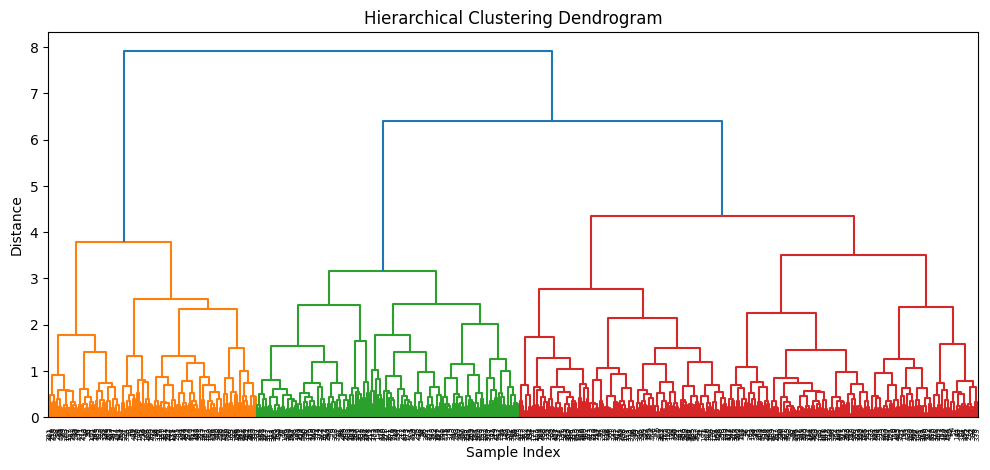

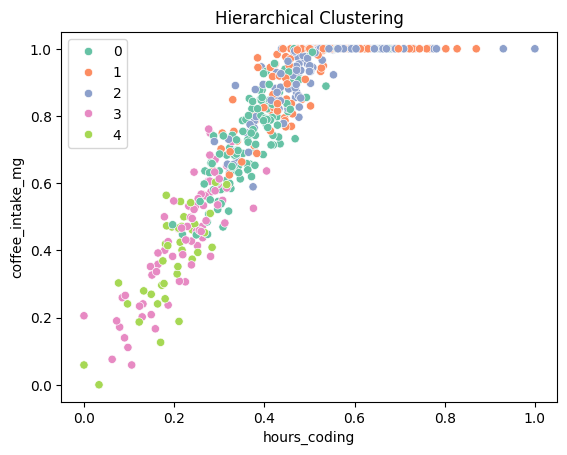

In [11]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

features = df.drop(['task_success'], axis=1)

hier = AgglomerativeClustering(n_clusters=5, linkage='ward')
hier_labels = hier.fit_predict(features)


sil_score_h = silhouette_score(features, hier_labels)
ch_score_h = calinski_harabasz_score(features, hier_labels)

print("Hierarchical Clustering Results")
print("Labels:", hier_labels[:10])  
print("Silhouette Score:", sil_score_h)
print("Calinski-Harabasz Index:", ch_score_h)



linked = linkage(features, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(linked, labels=df.index.values, leaf_rotation=90) 
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

sns.scatterplot(x=features.iloc[:,0], y=features.iloc[:,1], hue=hier_labels, palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()
